<a href="https://colab.research.google.com/github/Rohitkumar1011/Book-Recommender-system.ipynb/blob/main/Book_Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BOOK RECOMMENDER SYSTEM

INTRODUCTION

During the last few decades, recommender systems have taken more and more place in our lives. From e-commerce to online advertisement, recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users. Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.

**Dataset Description**


we have 3 files in our dataset which is extracted from some books selling websites.

*   Books – first are about books which contain all the information related to books like an author, title, publication year, etc.
*   Users – The second file contains registered user’s information like user id, location.

*   ratings –  Ratings contain information like which user has given how much rating to which book.

So based on all these three files we can build a powerful collaborative filtering model. let’s get started.




# Modules and Datasets



*   Importing the modules



In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for similar object 
from sklearn.metrics.pairwise import cosine_similarity

# for viewing the images
from IPython.display import Image



*   **Loading the dataset**



In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading file
books = pd.read_csv('/content/drive/My Drive/Datasets/Books.csv')
users = pd.read_csv('/content/drive/My Drive/Datasets/Users.csv')
ratings = pd.read_csv('/content/drive/My Drive/Datasets/Ratings.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Total number of rows and columns
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


# DATA UNDERSTANDING

In [5]:
# Top 5 rows
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
# Top 5 rows
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# First few rows of the ratings Dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# All columns in Books Dataset
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [9]:
# All columns in Users Dataset
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [10]:
# All columns in Ratings Dataset
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

# Exploratory Data Analysis



*   Checking for Null values



In [11]:
# Checking null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
# Checking null values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
# Checking null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64



*   Checking for Duplicated Values



In [14]:
# Checking Duplitcate values
books.duplicated().sum()

0

In [15]:
# Checking Duplitcate values
ratings.duplicated().sum()

0

In [16]:
# Checking Duplitcate values
users.duplicated().sum()

0



*   Removing null values



In [17]:
# Viewing the null values
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [18]:
# Dropping all the null values permanently
books.dropna(inplace=True)

In [19]:
# rechecking the books dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [20]:
# No of Unique Book Authors in our dataset
len(books['Book-Author'].unique())

102020

In [21]:
# No of Unique Books in our dataset
len(books['Book-Title'].unique())

242130

In [22]:
# No of Unique Book Publishers in our dataset
len(books['Publisher'].unique())

16803

In [23]:
# Authors with the highest books
books['Book-Author'].value_counts().head()

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: Book-Author, dtype: int64

Text(0.5, 1.0, 'No of books by an author (Top 15)')

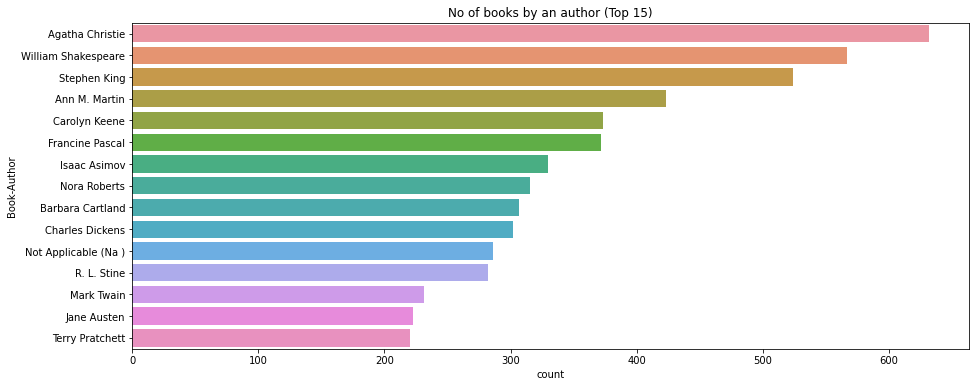

In [24]:
# plotting Graph for Book author
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Agatha Christie Books were sold maximum

In [25]:
# Top 5 books that has been republished many times
books['Book-Title'].value_counts().head()

Selected Poems       27
Little Women         24
Wuthering Heights    21
Dracula              20
The Secret Garden    20
Name: Book-Title, dtype: int64

Text(0.5, 1.0, 'Book-Title')

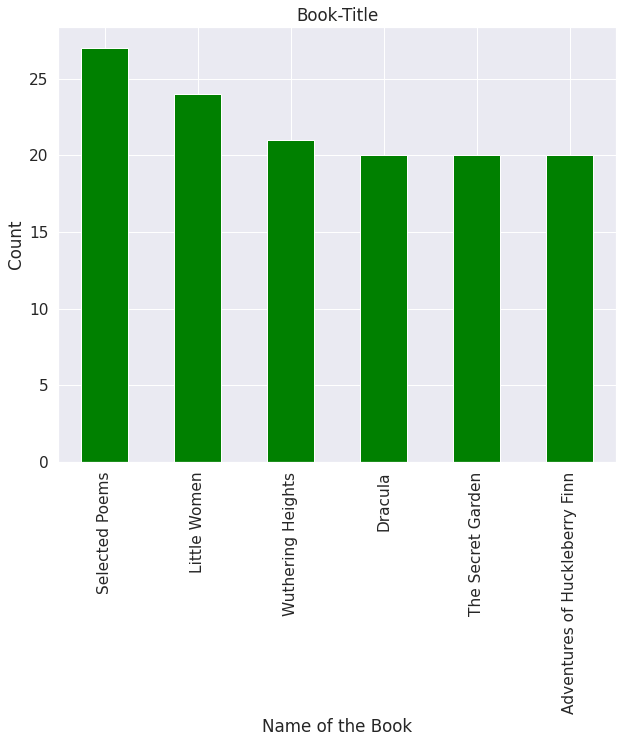

In [26]:
# Plotting graph for BookS
sns.set(font_scale= 1.4)
books['Book-Title'].value_counts()[:6].plot(kind='bar', figsize=(10,8), color = 'green',
                                                      xlabel='Name of the Book', 
                                                      ylabel='Count')

plt.title("Book-Title")

**Ratings on top books**

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

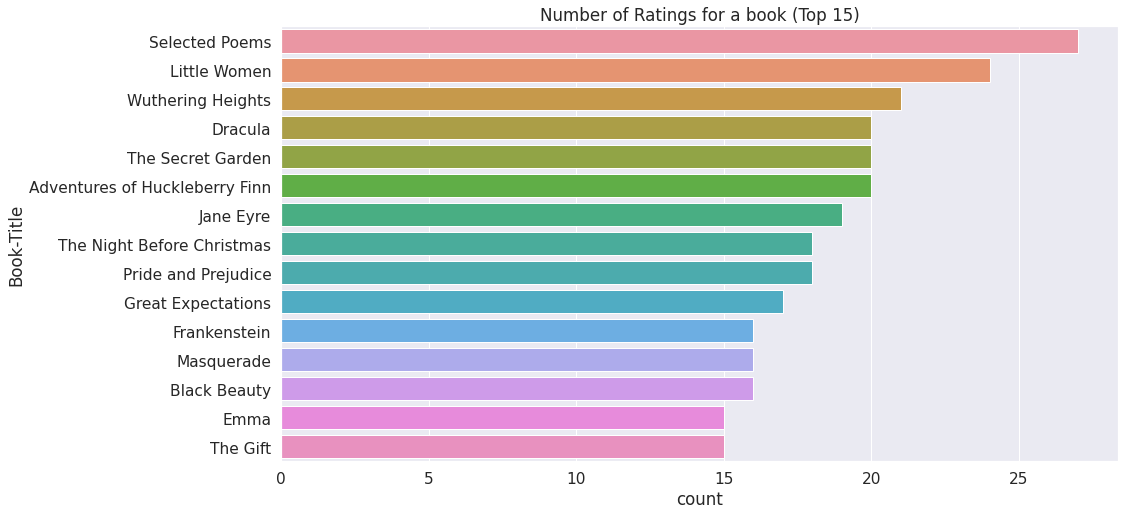

In [27]:
# Number of ratings of books
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

**Book rating Distribution**

Text(0.5, 1.0, 'Explicit Ratings')

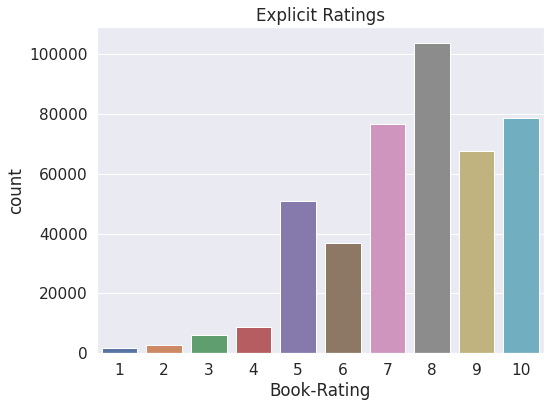

In [28]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

Rating 8 is maximum, then 10 and 7.

**Age Disribution**

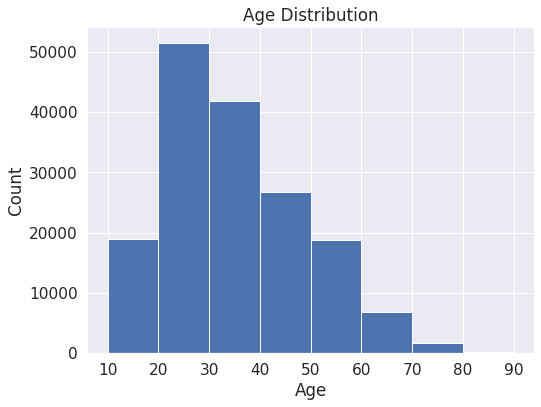

In [29]:
# People reading Books
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

People Between 20-40 years of age are reading Books more.

Text(0.5, 1.0, 'No of readers from different location (Top 10)')

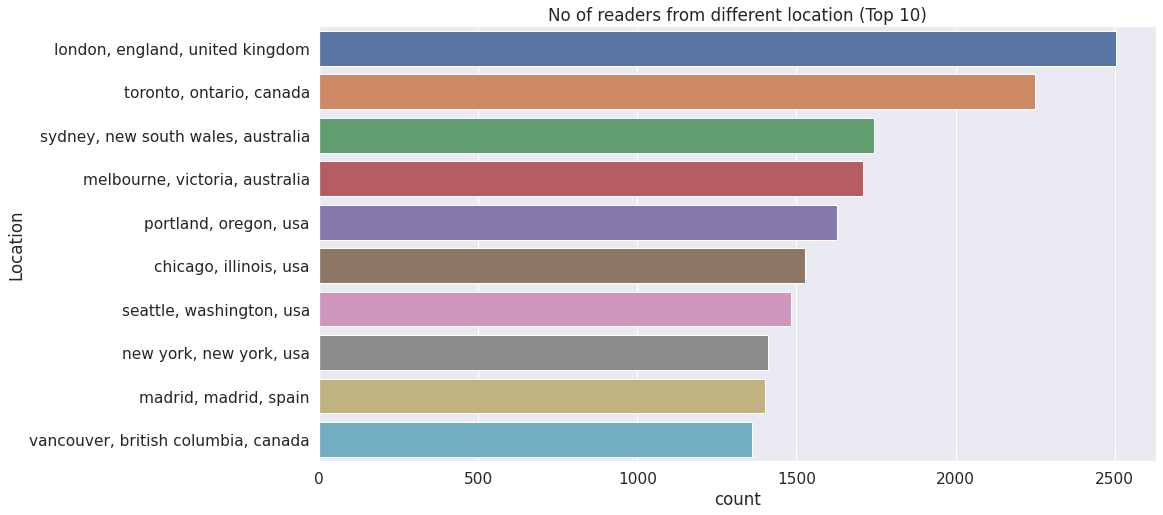

In [30]:
# Plot for different Locations
plt.figure(figsize=(15,8))
sns.countplot(y="Location", data=users, order=users['Location'].value_counts().index[0:10])
plt.title("No of readers from different location (Top 10)")

In [31]:
# Top 5 publication year that has seen maximum publications
books['Year-Of-Publication'].value_counts().head()

2002    13902
2001    13714
1999    13414
2000    13373
1998    12116
Name: Year-Of-Publication, dtype: int64

Text(0.5, 1.0, 'Year-Of-Publication')

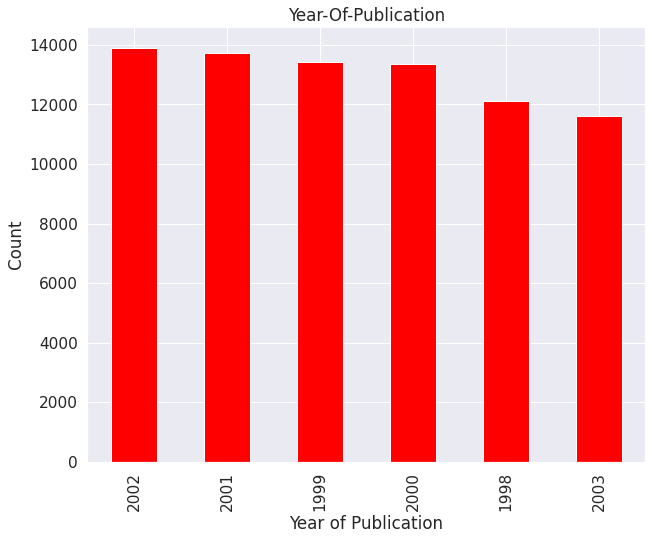

In [32]:
# Plotting graph for year of publication
sns.set(font_scale= 1.4)
books['Year-Of-Publication'].value_counts()[:6].plot(kind='bar', figsize=(10,8), color = 'red',
                                                      xlabel='Year of Publication', 
                                                      ylabel='Count')
plt.title("Year-Of-Publication")

Maximum Books were Published on 2002

In [33]:
# Top 5 Publishers with maximum books being puublished
books['Publisher'].value_counts().head()

Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

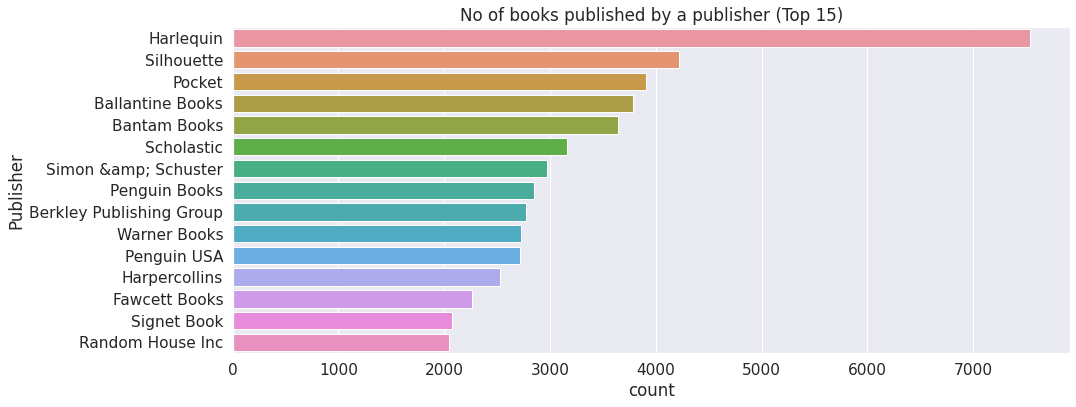

In [34]:
# Plotting graph for publisher
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

Harlequin is publishing maximum books



# **Popularity Based Recommender System** 

We will merge the ratings dataset with the books dataset

In [35]:
# Merging Books and Ratings Dataset on ISBN
ratings_with_name = ratings.merge(books,on='ISBN')

In [36]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


**Ratings on Differrent BOOKS**

In [37]:
# Calculating Total ratings on different Books
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [38]:
# Calculating Average Rating of all the Books.
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [39]:
# Finding Popular Books
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [40]:
# Finding Popular books with Number of rating greater than 250
top_50_books = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
top_50_books

,Book-Title,num_ratings,avg_rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191608,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211380,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219737,To Kill a Mockingbird,510,4.700000


In [41]:
# Popular Books after dropping duplicates Book Title
top_50_books = top_50_books.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
top_50_books

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [42]:
popular_df.shape

(241066, 3)

# **Collaborative Filtering Based Recommender System**

**Taken Only those users who has rated atleast 200 books**

In [43]:
# Finding Users who has given more than 200 ratings
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
well_educated_users = x[x].index
well_educated_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

**Taken only those books which is rated by only those users who has rated atleast 200 books**

In [44]:
# Finding books in which rating is done by well educated users
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(well_educated_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030876,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030877,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030878,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030879,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


**Only those books are taken in which atleast 50 ratings are given**

In [45]:
# Books on which rating is more than 50
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

**Now finding those books on which number of rating is greater than 50 and ratings are given by well-educated users.**

In [46]:
# famous books
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


**Pivot table** : - It is used to represent value of more than 2 categories.

In [47]:
# Applying Pivot Table
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 706 Books and 810 well educated users

**Euclidean Distance of all the books with each other**

In [48]:
# To calculte the same type of books for one book we will use the concept of euclidean distances on vectors
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [49]:
similarity_scores.shape

(706, 706)

**Making the recommendation Function**

In [50]:
# This function take books name and return recommended 
def recommend_me_books(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

**Recommendation Books**

In [51]:
recommend_me_books('Animal Farm')

[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg']]

In [52]:
recommend_me_books('4 Blondes')

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pride and Prejudice',
  'Jane Austen',
  'http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg'],
 ['Pleading Guilty',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446365505.01.MZZZZZZZ.jpg'],
 ['Seabiscuit',
  'LAURA HILLENBRAND',
  'http://images.amazon.com/images/P/0345465083.01.MZZZZZZZ.jpg']]

### **Nearest Neighbors Algorithm**

In [53]:
# Converting the pivot table to a sparse matrix
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

books_pivot_sparse = csr_matrix(pt)

In [54]:
# Assigning the model

model = NearestNeighbors(algorithm='auto')

In [55]:
# Fitting the model

model.fit(books_pivot_sparse)

NearestNeighbors()

In [56]:
# Creating a function for book recommendation
def recommend_book(book):
  '''
  Recommends 5 books on the basis of the input book
  '''
  index=np.where(pt.index==book)[0][0]
  distances, names = model.kneighbors(pt.iloc[index,:].values.reshape(1,-1), n_neighbors=6)
  
  for i in range(len(names)):
    print('The book recommendations for you are:\n')
    a = list(pt.index[names[i]][1:])
    print(*a, sep='\n')

In [57]:
# Testing the model

recommend_book('1984')

The book recommendations for you are:

No Safe Place
A Civil Action
Foucault's Pendulum
Exclusive
Waiting to Exhale


# **Evaluation Metrics**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [60]:
final_df = books.merge(ratings, on='ISBN')
final_df = final_df.merge(users, on='User-ID')

In [61]:
final_df = final_df[final_df['Book-Rating'] != 0]

In [62]:
books_reduce = final_df.groupby(['ISBN'])['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)
reduced_books = books_reduce[books_reduce['Book-Rating']>10]['ISBN']
final_df = final_df.merge(reduced_books, how='inner', left_on='ISBN', right_on='ISBN')

In [63]:
counts1 = final_df['User-ID'].value_counts()
final_df = final_df[final_df['User-ID'].isin(counts1[counts1 >=10].index)].reset_index()
final_df.drop(columns='index', inplace=True)

In [64]:
final_df['Year-Of-Publication'] = pd.to_numeric(final_df['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')

In [65]:
final_df['Year-Of-Publication'] = pd.to_numeric(final_df['Year-Of-Publication'], 'coerce')

In [66]:
final_df.shape

(64993, 12)

In [67]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = final_df.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = final_df.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [68]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [69]:
final_df = pd.merge(final_df, rating_count, on='Book-Title', how='inner')
final_df = pd.merge(final_df, rating_mean, on='Book-Title', how='inner')

In [70]:
# rounding off the rating mean feature to 2 decimal points
final_df['Rating-Mean'] = final_df['Rating-Mean'].round(2)

In [71]:
#final_df = final_df[final_df['Rating-Count']>10]

In [72]:
import math

In [73]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = final_df.groupby(['User-ID','Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(2)

# of unique user/item interactions: 64692


,User-ID,Book-Title,Book-Rating
0,243,A Map of the World,3.000000
1,243,A Monk Swimming,2.584963


In [74]:
from sklearn import preprocessing

In [75]:
le = preprocessing.LabelEncoder()
le.fit(interactions_full_df['Book-Title'].unique())

LabelEncoder()

In [76]:
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [77]:
final_df.shape

(64993, 14)

In [78]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df, 
                                   test_size=0.20,
                                   stratify=interactions_full_df['User-ID'],
                                   random_state=42)

print(f'No. of interactions on Train set: %d{len(interactions_train_df)}')
print(f'No. of interactions on Test set: %d{len(interactions_test_df)}')

No. of interactions on Train set: %d51753
No. of interactions on Test set: %d12939


In [79]:
interactions_train_df['Book-Title'] = le.transform(interactions_train_df['Book-Title'])
interactions_test_df['Book-Title'] = le.transform(interactions_test_df['Book-Title'])

interactions_train_df.head()

,User-ID,Book-Title,Book-Rating
2302,11601,3074,3.459432
36320,150561,1291,3.169925
31457,129690,3862,3.459432
57733,245827,2793,2.584963
9689,36609,2484,3.000000


In [80]:
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='Book-Title', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head(2)

Book-Title,0,1,2,3,4,5,6,7,8,9,...,4221,4222,4223,4224,4225,4226,4227,4228,4229,4230
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,3.321928,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 805, 882, 929, 1025, 1131, 1424]

In [83]:
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [84]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [85]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-0.0082263 ,  0.00292913, -0.00174255, ..., -0.00286925,
         0.01204249, -0.01852105],
       [ 0.0289742 ,  0.06435525,  0.00983723, ...,  0.00559225,
         0.00129495,  0.0441735 ],
       [-0.00197127, -0.00335308, -0.0030813 , ...,  0.00194321,
        -0.00098427,  0.02768874],
       ...,
       [-0.01513843,  0.01881224, -0.01318728, ..., -0.00894763,
        -0.00477625,  0.00694233],
       [ 0.00846531, -0.00596157,  0.01015867, ...,  0.00325763,
         0.01277856, -0.00708614],
       [ 0.00045101,  0.00902418,  0.00856233, ...,  0.00293237,
         0.00271583,  0.00199807]])

In [86]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(2)

,243,254,507,638,805,882,929,1025,1131,1424,...,278026,278137,278188,278194,278202,278418,278535,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
0,-0.008226,0.028974,-0.001971,0.001519,0.005273,0.006368,0.014155,0.002909,-0.007831,-0.001103,...,-0.009224,0.002556,-0.002823,-0.005797,-0.002459,0.006463,-0.010473,-0.015138,0.008465,0.000451
1,0.002929,0.064355,-0.003353,-0.020158,-0.012721,-0.002646,0.003323,-0.002694,0.003036,-0.000999,...,0.011516,0.001802,-0.001367,-0.002936,0.006475,0.002286,0.029363,0.018812,-0.005962,0.009024


In [87]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book-Title', 
                                                          right_on = 'Book-Title')[['recStrength','Book-Title']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, items_df=final_df)

In [88]:
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [89]:
interactions_test_indexed_df.head()

,Book-Title,Book-Rating
User-ID,,
135703,3436,3.169925
109349,1852,3.000000
196502,698,3.169925
55789,3363,3.459432
178201,3711,3.000000


In [90]:
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['Book-Title']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [91]:
import random

In [92]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(final_df['Book-Title'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['Book-Title']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['Book-Title'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['Book-Title'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%2)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book-Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator() 

In [93]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
2538 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.9987634283947755, 'recall@10': 0.9987634283947755}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
19,326,326,328,0.993902,0.993902,11676
845,63,63,63,1.000000,1.000000,16795
67,55,55,55,1.000000,1.000000,153662
198,55,55,55,1.000000,1.000000,98391
21,53,53,53,1.000000,1.000000,95359
174,53,53,53,1.000000,1.000000,104636
63,49,49,49,1.000000,1.000000,114368
285,38,38,38,1.000000,1.000000,158295
331,38,38,38,1.000000,1.000000,60244
185,37,37,37,1.000000,1.000000,123883


# **Conclusion**

*   Book Recommender system is working as our system recommended books for animal farm which are related and has similar ratings
*   All the books recommended by system is properly rated by well educated readers due to which giving good results





